In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image

Stack overflow links (cross corr between images): https://stackoverflow.com/questions/22269627/cross-correlation-between-two-images
Stack overflow link (Image interpretation): https://dsp.stackexchange.com/questions/45968/image-cross-correlation-interpretation

Helpful snippets of code from other labs

To create an image; an array of black pixels, use 0 for black pixels and 1 for white pixels.

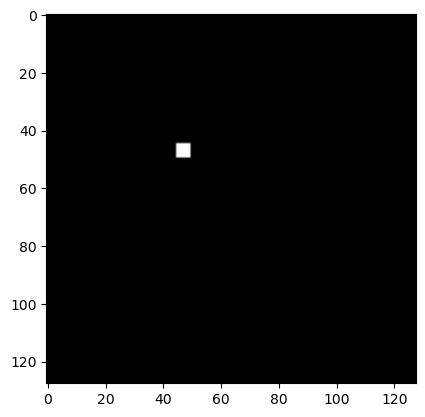

In [59]:
# Create I with 128x128 zeros
I = np.zeros((128, 128))   # create an array of zeros, first number is number or rows, second is number of columns
I[45:50, 45:50] = 1 # this alters the white sqaure added, makes it so pixels 40 to 82 are white 
# Display your I, using its vmin and vmax value in gray scale.

plt.imshow(I, cmap="gray", vmin = np.min(I), vmax = np.max(I)) # cmap = color map, "vmin" - , "vmax" - 

[[1.]]


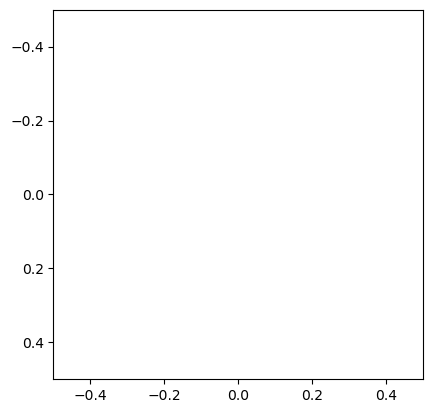

In [69]:
template = np.ones((1,1)) 
print(template)
plt.imshow(template, cmap="gray", vmin = 0, vmax = 1)

In [61]:
from scipy.signal import correlate2d
corr = correlate2d(I, template, boundary='symm', mode='same')

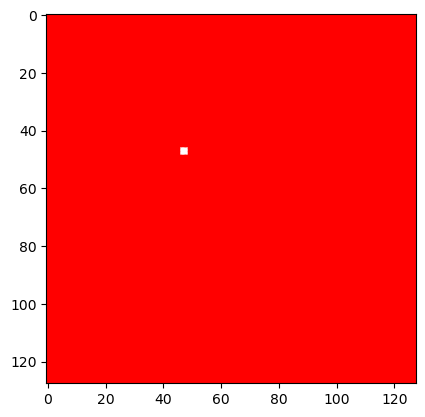

In [66]:
# WHERE IT DOESNT MATCH
y, x = np.unravel_index(np.where(corr == corr.min()), corr.shape)  # find the match
x_n = []
y_n = []
for i, value in enumerate(corr.flatten()):
    if value == corr.min():
        y, x = np.unravel_index(i, corr.shape)
        y_n.append(y)
        x_n.append(x)

plt.imshow(I, cmap='gray')
plt.plot(x_n, y_n, 'ro')

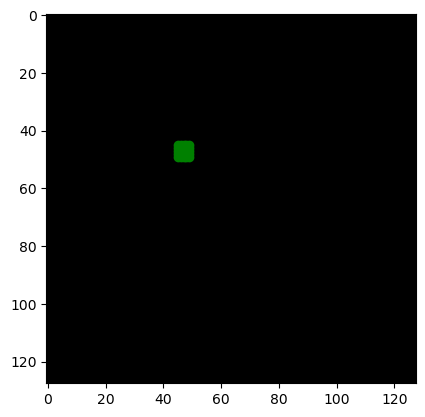

In [67]:
#WHERE IT DOES MATCH
y, x = np.unravel_index(np.argmax(corr), corr.shape) 
x_s = []
y_s = []
for i, value in enumerate(corr.flatten()):
    if value == corr.max():
        y, x = np.unravel_index(i, corr.shape)
        y_s.append(y)
        x_s.append(x)

plt.imshow(I, cmap='gray')
plt.plot(x_s, y_s, 'go')

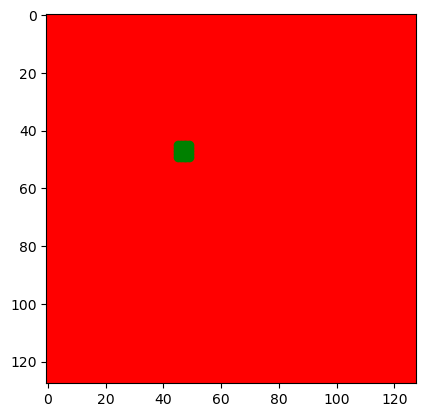

In [68]:
#PLOTTING BOTH
plt.imshow(I, cmap='gray')
plt.plot(x_n, y_n, 'ro')
plt.plot(x_s, y_s, 'go')

note: when convolving the image with a filter, you should use mode = same because we want the image to stay the sam esize as before manipulation. 

In [3]:
### correlation function
def corr_func(tx, th, x, h):
    """The Correlation Function
    The purpose of this function is to perform correlations.
    The function begins by determing dt by dubtracting two points in the time array
    Args:
        tx (array): time array for x function
        th (array): time array for impulse function
        x (array): array that represents x function
        h (array): array that represents h function 

    Returns:
        tc (array):
        yfinal3 (array):
    """
    # find dt
    dt = tx[1] - tx[0]

    # find left most time point
    l_x = tx[0]
    l_h = th[0]

    # find right most time point
    r_x = tx[-1]
    r_h = th[-1]
    
    ly = l_x - r_h # Left endpoint for Rxy
    ry = r_x - l_h # Right endpoint for Rxy

    # create t of convolved function using the variables above
    tc = np.arange(ly, ry + (dt/2), dt)
    y = np.ones(len(tc))
    y2 = np.convolve(x, np.flip(h), mode = "full")
    y_final = (y2 / np.max(y2))
    return tc, y_final

Goal One:
Convolving one image with another; Applying filter to images; Correlating image with one another with minute differences; Analyzing changes in correlation performance

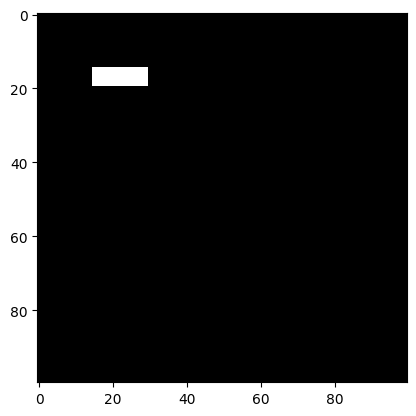

In [9]:
## creating an image
I_1 = np.zeros((100, 100))
I_1[15:20, 15:30] = 1  #upperrowlimit:bottomrow, extending to left,extending to right
plt.imshow(I_1, cmap="gray", vmin = np.min(I_1), vmax = np.max(I_1))

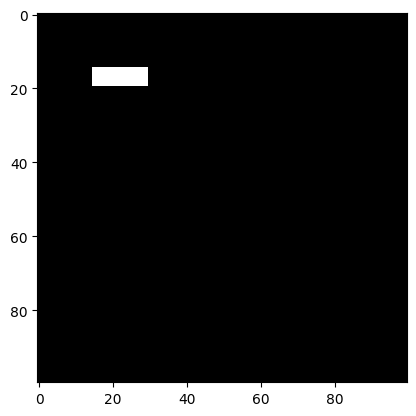

In [10]:
## creating an image
I_2 = np.zeros((100, 100))
I_2[15:20, 15:30] = 1  #upperrowlimit:bottomrow, extending to left,extending to right
plt.imshow(I_2, cmap="gray", vmin = np.min(I_2), vmax = np.max(I_2))

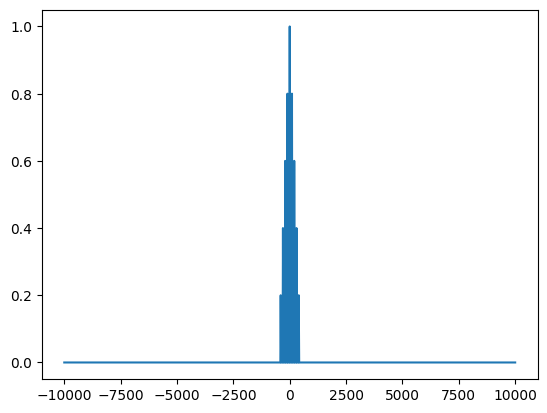

In [16]:
I_1_array = I_1.flatten()
I_2_array = I_2.flatten()

"""print(len(I_2_array))
print(len(I_1_array))"""

t_array = np.arange(0, len(I_1_array))
"""print(len(t_array))
print(t_array)"""

tc, ty = corr_func(t_array, t_array, I_1_array, I_2_array)
plt.plot(tc, ty)

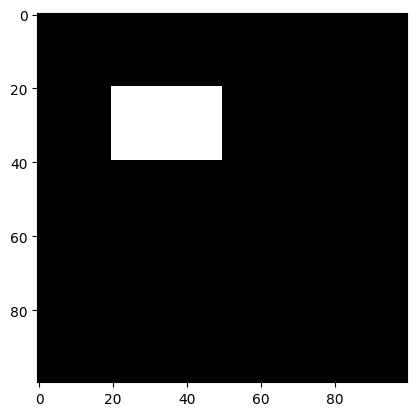

In [23]:
I_1 = np.zeros((100, 100))
I_1[20:40, 20:50] = 1  #upperrowlimit:bottomrow, extending to left,extending to right
plt.imshow(I_1, cmap="gray", vmin = np.min(I_1), vmax = np.max(I_1))

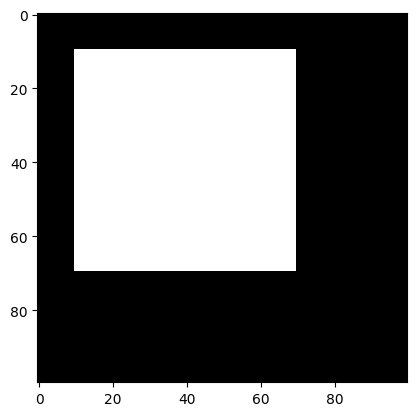

In [26]:
## creating an image
I_2 = np.zeros((100, 100))
I_2[10:70, 10:70] = 1  #upperrowlimit:bottomrow, extending to left,extending to right
plt.imshow(I_2, cmap="gray", vmin = np.min(I_2), vmax = np.max(I_2))

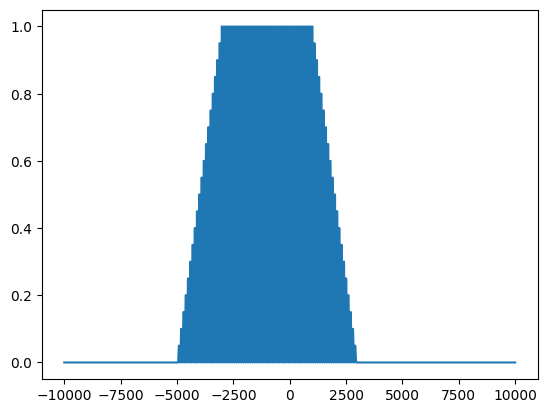

In [27]:
I_1_array = I_1.flatten()
I_2_array = I_2.flatten()

"""print(len(I_2_array))
print(len(I_1_array))"""

t_array = np.arange(0, len(I_1_array))
"""print(len(t_array))
print(t_array)"""

tc, ty = corr_func(t_array, t_array, I_1_array, I_2_array)
plt.plot(tc, ty)

Need code that will detect if pixels between two different images shifted or not. How can we go through the code and see what has shifted?

In [32]:
count = 0
pixel_differences = []

for i in range(0, len(I_1)):
    if I_1[i,i] == I_2[i,i]:
        pass
    else:
        pixel_differences.append(count)
    count += 1

print("The images are different at {} pixel indices".format(pixel_differences))

The images are different at [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69] pixel indices
